## Ali Alaryan
### Project 2 :SIR model parameter estimation for COVID-19 spread in Italy most affected city [Lombordia]

### COVID data Import

Text(0.5,0,'From the date 2020-02-24 onward')

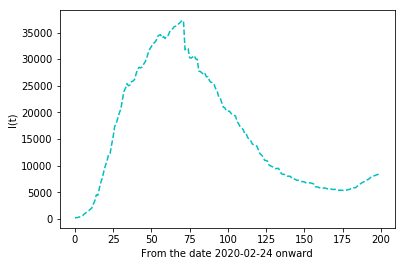

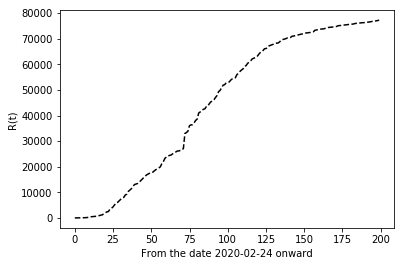

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('DATA_ITALY.csv')
Itemp= data.CurrentPositiveCases.values # always wearing
Rtemp= data.Recovered.values # always wearing
Dtemp=data.Deaths.values
Idata=Itemp[0:200]
Rdata=Rtemp[0:200]
Ddata=Dtemp[0:200]
n=len(Idata)
t=np.linspace(0,n-1,n)

# plot results

plt.figure()
plt.plot(t,Idata,'c--',label=r'$I(t)$')
plt.xlabel('From the date 2020-02-24 onward')
plt.ylabel('I(t)')
plt.figure()
plt.plot(t,Rdata,'k--',label=r'$R(t)$')
plt.ylabel('R(t)')
plt.xlabel('From the date 2020-02-24 onward')

In [2]:
data.head()

,Date,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases
0,2020-02-24T18:00:00,166,166,0,6,172
1,2020-02-25T18:00:00,231,68,0,9,240
2,2020-02-26T18:00:00,249,18,0,9,258
3,2020-02-27T18:00:00,349,145,40,14,403
4,2020-02-28T18:00:00,474,128,40,17,531


## Model Equations

The SIR-D model equations can be written in LaTeX as follows:

$$\begin{aligned} \frac{dS}{dt} &= -\beta S \frac{I}{N} \\
\frac{dI}{dt} &= \beta S \frac{I}{N} - \gamma I - \mu I \\
\frac{dR}{dt} &= \gamma I \\
\frac{dD}{dt} &= \mu I \end{aligned}$$

where:

$S$ is the number of susceptible individuals
$I$ is the number of infected individuals
$R$ is the number of recovered individuals
$D$ is the number of dead individuals
$N$ is the total population size
$\beta$ is the transmission rate of the disease (the rate at which susceptible individuals become infected)
$\gamma$ is the recovery rate (the rate at which infected individuals recover)
$\mu$ is the death rate (the rate at which infected individuals die)
$\frac{dS}{dt}$, $\frac{dI}{dt}$, $\frac{dR}{dt}$, and $\frac{dD}{dt}$ are the rates of change of the respective populations over time.

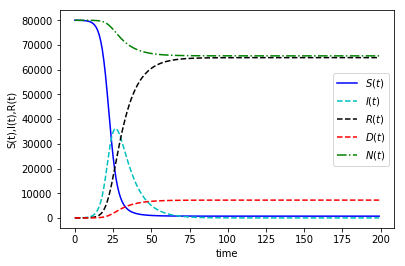

In [22]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import least_squares
from scipy.optimize import minimize

def SIR_MODEL(y,t,params):
    # Extract model parameters
    beta, gamma,delta = params
    S=y[0]
    I=y[1]
    R=y[2]
    D=y[3]
    N=S+I+R+D
    # Define ODEs
    dSdt = -beta * S * I/N
    dIdt = beta * S * I/N - gamma * I-delta*I
    dRdt = gamma * I - delta*I
    dDdt = delta*I
    dydt =[dSdt,dIdt,dRdt,dDdt]
    return dydt

# time points
t = np.linspace(0,n-1,n)
z0=[80000,10,0,0]
# solve ODE
beta=0.5
gamma=0.1
delta=0.01
params=beta,gamma,delta
z = odeint(SIR_MODEL,z0,t,args=(params,))
N = z[:,1]+z[:,2]+z[:,0]
# plot results
plt.plot(t,z[:,0],'b-',label=r'$S(t)$')
plt.plot(t,z[:,1],'c--',label=r'$I(t)$')
plt.plot(t,z[:,2],'k--',label=r'$R(t)$')
plt.plot(t,z[:,3],'r--',label=r'$D(t)$')
plt.plot(t,N,'g-.',label=r'$N(t)$')
plt.ylabel('S(t),I(t),R(t)')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

In [4]:
 #Define residual function
def sir_residual(params):
    # Extract model parameters
    beta,gamma,delta = params
    t = np.linspace(0,n-1,n)
    # Initialize model variables
    I0=Idata[0]
    R0 =Rdata[0]
    D0=0
    S0 = N0-I0-R0-D0
    
    #delta=0
    consts=beta,gamma,delta
    #consts=beta,gamma
    # Use ODE solver to simulate model
    sol = odeint(SIR_MODEL, [S0, I0, R0,D0], t, args=(consts,))
    S, I, R, D = sol.T

    # Calculate residuals
    res_I = (I - Idata)/np.max(Idata)
    res_R = (R - Rdata)/np.max(Rdata)
    res_D = (D - Ddata)/np.max(Ddata)
    SSE =np.sum(res_I**2+res_R**2+res_D**2)
    # Return residuals
    return SSE

In [5]:
# solve ODE
N0=120000
beta,gamma,delta=0.5,0.5,0.01

params=beta,gamma,delta

print(sir_residual(params))

274.43106883154576


In [6]:
x0=(0.1,0.05,0.01)
sol = minimize(sir_residual, x0);
print(sol)
beta, gamma,delta=sol.x
#print(beta, gamma,delta)
print(f'beta = {beta:.3f}, gamma = {gamma:.3f}, delta = {delta:.3f}')

      fun: 16.943344926791852
 hess_inv: array([[ 8.72640537e-09, -2.52245223e-07, -1.29062961e-07],
       [-2.52245223e-07,  7.80457262e-06,  3.98031656e-06],
       [-1.29062961e-07,  3.98031656e-06,  2.03025864e-06]])
      jac: array([ 0.91257811, -0.74287152,  1.43434906])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 565
      nit: 20
     njev: 111
   status: 2
  success: False
        x: array([0.17524235, 0.04052047, 0.00788318])
beta = 0.175, gamma = 0.041, delta = 0.008


119834 166 0
200
200


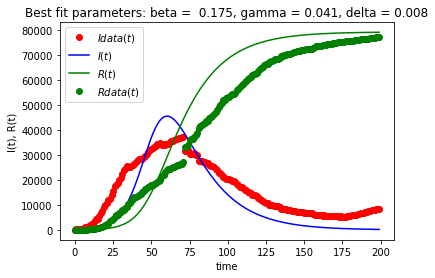

In [7]:
I0=Idata[0]
R0 =Rdata[0]
D0=0
S0 = N0-I0-R0

print(S0,I0,R0)
params=(beta,gamma,delta)
# Use ODE solver to simulate model
t=np.linspace(0,n-1,n)
sol = odeint(SIR_MODEL, [S0,I0, R0,D0], t, args=(params,))
S, I, R,D = sol.T
#plt.scatter(x, y, 'bo', label='Data');
# plot results
plt.figure
plt.plot(t,Idata,'ro',label=r'$Idata(t)$')
plt.plot(t,I,'b-',label=r'$I(t)$')

plt.plot(t,R,'g-',label=r'$R(t)$')
plt.plot(t,Rdata,'go',label=r'$Rdata(t)$')
print(len(t))
print(len(Idata))
plt.ylabel('I(t), R(t)')
plt.xlabel('time')
plt.legend(loc='best')
titlestring = "Best fit parameters: beta =  {:.3f}, gamma = {:.3f}, delta = {:.3f}".format(beta,gamma,delta)
plt.title(titlestring)
plt.show()

200
200


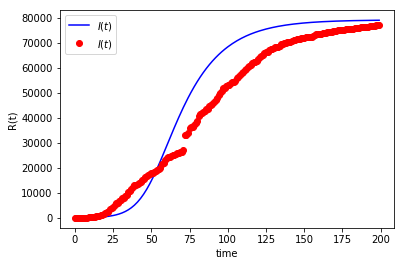

In [8]:
plt.figure
plt.plot(t,R,'b-',label=r'$I(t)$')
plt.plot(t,Rdata,'ro',label=r'$I(t)$')
print(len(t))
print(len(Idata))
plt.ylabel('R(t)')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

200
200


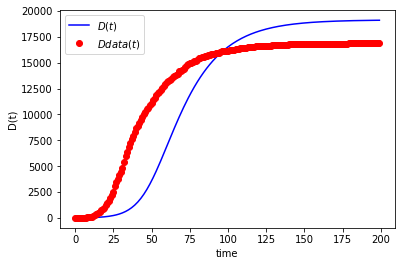

In [9]:
plt.figure
plt.plot(t,D,'b-',label=r'$D(t)$')
plt.plot(t,Ddata,'ro',label=r'$Ddata(t)$')
print(len(t))
print(len(Idata))
plt.ylabel('D(t)')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Sensitivity Analysis

#### Global Sensitivity Analysis (one approach):
   In order to analyze the sensitivity of a system to changes in its parameters, we can perturb the parameters multiple times over a broad range of values. It is important to choose a range that is meaningful for the specific system and question we are trying to answer.

Once we have chosen our range, we can run the system's equations (odes) for each parameter set and collect the output. We can then fit the output to a linear model in order to estimate the sensitivity of the system to changes in the parameters.

The choice of output (i.e. the steady state value, maximum over time, area under the curve, etc.) will depend on the specific question we are trying to answer. For example, if we are interested in the maximum response of the system to a perturbation, we may choose to use the maximum value over time as our output.

Why use a linear model? By using a linear model, we can easily estimate the sensitivities of the system by applying least squares regression. This allows us to determine how sensitive the system is to changes in each of its parameters.

For example, if y and k are our nominal output and sensitivity, respectively, our normalized sensitivity is given by 𝑆̂ =Δ𝑦∗𝑘Δ𝑘∗𝑦. If we multiply both sides by 𝑘/Δ𝑘, we get Δ𝑦𝑦=𝑆̂ Δ𝑘𝑘. If we have multiple parameters (𝑘𝑖), we can repeat this process for each parameter and get Δ𝑦𝑦=𝑆1^Δ𝑘1𝑘1+𝑆2^Δ𝑘2𝑘2+...+𝑆𝑛^Δ𝑘𝑛𝑘𝑛. Since everything in this equation is known except for the values of the sensitivities, 𝑆𝑖^, we can use least squares regression to estimate these values. This allows us to determine the sensitivity of the system to changes in each of its parameters.

### Here our objective is maximum number of infections that can be occured due to disease spread. We can also take total deaths due to COVID spread.

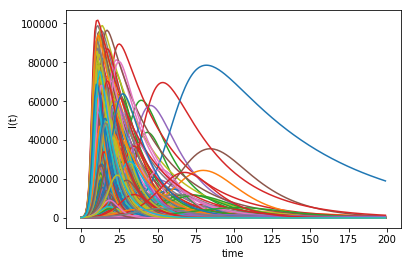

In [10]:
# generate several output for random selections of parameters
N = 1000;
betas = np.random.uniform(0,1,N);
gammas= np.random.uniform(0,1,N);
deltas=np.random.uniform(0,0.1,N);

# here we have parameter of interest : Population infected due to disease spread
PInterest = np.zeros(N);
I0=Idata[0]
R0 =Rdata[0]
D0=0
S0 = N0-I0-R0


# Use ODE solver to simulate model
t=np.linspace(0,n-1,n)


for m in np.arange(0,N,1):
    params=(betas[m],gammas[m],deltas[m])
    sol = odeint(SIR_MODEL, [S0,I0, R0,D0], t, args=(params,))
    S, I, R,D = sol.T
    plt.plot(t,I);
    plt.xlabel("time");
    plt.ylabel("I(t)");
    PInterest[m]=np.max(I);

### Global Sensitiviy

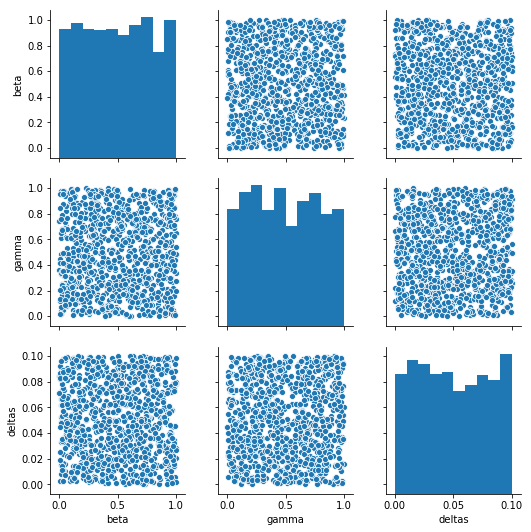

In [11]:
# Plot histograms of sampled parameter space
import pandas as pd
import seaborn as sns

tmp = {'beta':betas, 'gamma':gammas, 'deltas':deltas};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)  
20
plt.show()

### Curve fitting: 



Our fitted equn is y =  2.45241222039949 beta +  -4.088577617938725 gamma + 0.8819323445877032 delta
[ 2.45241222 -4.08857762  0.88193234]
0.5506083471559164


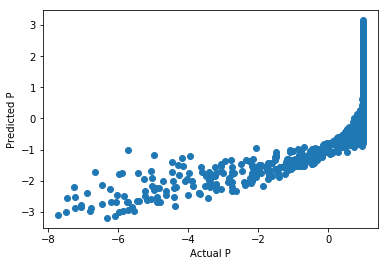

In [12]:
# Now we have our output of interest, called P. Using our old least squares code, let y = P and normalize the values by
# the value of P's steadystate for the nominal parameter values. This was calculated in step 1 above.

# Normalize y
mean_val = np.mean(PInterest)
y = (mean_val-PInterest)/mean_val; # See first set of code to find this number


# Build our X. Normalize values
X = np.c_[(1-betas),(1-gammas),(1-deltas)]

# Now can just do the linear least squares estimate
#===================================================

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "beta + ", params[1], "gamma +", params[2],"delta")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted P");
plt.xlabel("Actual P");

# # For completeness - let's throw in doing the same thing but with a Linear Regression package. I will show this in class
# # just so we're aware of these packages

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = False);
fitted = model.fit(X,y);
print(fitted.coef_)
print(fitted.score(X,y)) # R squared



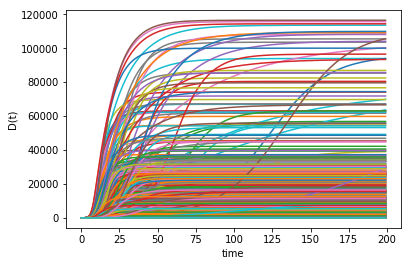

In [13]:
# generate several output for random selections of parameters
N = 1000;
betas = np.random.uniform(0,1,N);
gammas= np.random.uniform(0,1,N);
deltas=np.random.uniform(0,0.1,N);

# here we have parameter of interest : Population infected due to disease spread
PInterest = np.zeros(N);
I0=Idata[0]
R0 =Rdata[0]
D0=0
S0 = N0-I0-R0


# Use ODE solver to simulate model
t=np.linspace(0,n-1,n)


for m in np.arange(0,N,1):
    params=(betas[m],gammas[m],deltas[m])
    sol = odeint(SIR_MODEL, [S0,I0, R0,D0], t, args=(params,))
    S, I, R,D = sol.T
    plt.plot(t,D);
    plt.xlabel("time");
    plt.ylabel("D(t)");
    PInterest[m]=np.max(D);
    

Our fitted equn is y =  1.5170297254675469 beta +  -4.328165282847725 gamma + 1.487640837836281 delta
[ 1.51702973 -4.32816528  1.48764084]
0.3889545484437893


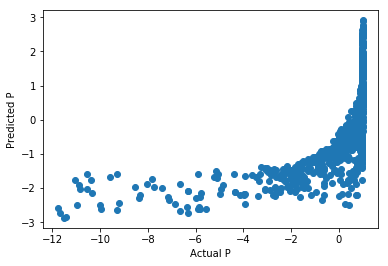

In [14]:
# Normalize y
mean_val = np.mean(PInterest)
y = (mean_val-PInterest)/mean_val; # See first set of code to find this number


# Build our X. Normalize values
X = np.c_[(1-betas),(1-gammas),(1-deltas)]

# Now can just do the linear least squares estimate
#===================================================

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "beta + ", params[1], "gamma +", params[2],"delta")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted P");
plt.xlabel("Actual P");

# # For completeness - let's throw in doing the same thing but with a Linear Regression package. I will show this in class
# # just so we're aware of these packages

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = False);
fitted = model.fit(X,y);
print(fitted.coef_)
print(fitted.score(X,y)) # R squared



### Bifurcation Analysis:


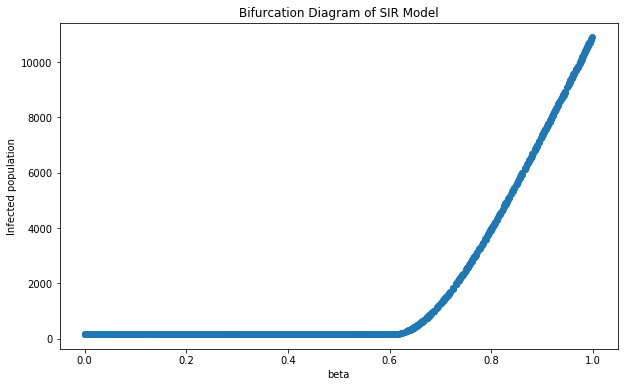

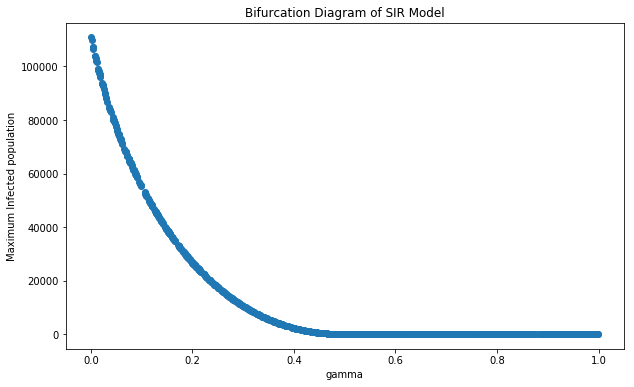

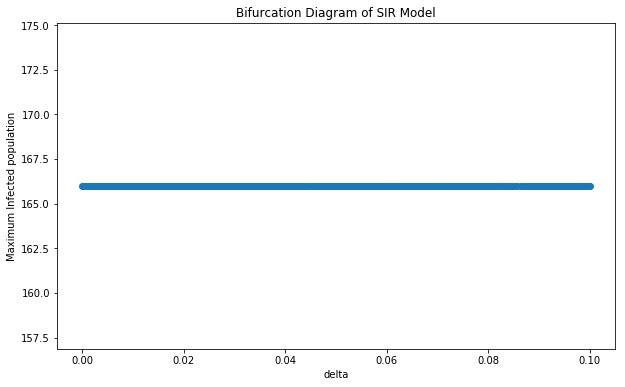

In [15]:
betas = np.random.uniform(0,1,N);
gammas= np.random.uniform(0,1,N);
deltas=np.random.uniform(0,0.1,N);

Imax = np.zeros(N);
def bifurcation_beta(beta_range, gamma,delta):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Bifurcation Diagram of SIR Model')
    ax.set_xlabel('beta')
    ax.set_ylabel('Infected population')
    
    for m in np.arange(0,N,1):
        params=(betas[m],gamma,delta)
        sol = odeint(SIR_MODEL, [S0,I0, R0,D0], t, args=(params,))
        S, I, R,D = sol.T
        Imax[m]=np.max(I)
    plt.plot(betas,Imax,'o');
    #plt.xlabel("beta");
    #plt.ylabel("Maximum Infected Population");
    
def bifurcation_gamma(gammas, beta,delta):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Bifurcation Diagram of SIR Model')
    ax.set_xlabel('gamma')
    ax.set_ylabel('Maximum Infected population')
    
    for m in np.arange(0,N,1):
        params=(beta,gammas[m],delta)
        sol = odeint(SIR_MODEL, [S0,I0, R0,D0], t, args=(params,))
        S, I, R,D = sol.T
        Imax[m]=np.max(I)
    plt.plot(gammas,Imax,'o');
    
    
def bifurcation_delta(gamma, beta,deltas):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title('Bifurcation Diagram of SIR Model')
    ax.set_xlabel('delta')
    ax.set_ylabel('Maximum Infected population')
    
    for m in np.arange(0,N,1):
        params=(beta,gamma,deltas[m])
        sol = odeint(SIR_MODEL, [S0,I0, R0,D0], t, args=(params,))
        S, I, R,D = sol.T
        Imax[m]=np.max(I)
    plt.plot(deltas,Imax,'o');

gamma = 0.6
delta =0.007

bifurcation_beta(betas,gamma,delta)
beta= 0.5
delta =0.007
bifurcation_gamma(gammas,beta,delta)


beta=0.5
gamma =0.6

bifurcation_delta(gamma, beta,deltas)

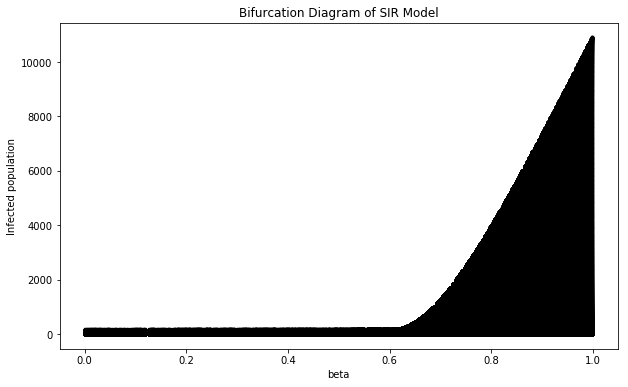

In [16]:
# Set initial conditions
S_0 = 0.99
I_0 = 0.01
R_0 = 0

# Set time range
t = np.linspace(0, 200, 10000)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Bifurcation Diagram of SIR Model')
ax.set_xlabel('beta')
ax.set_ylabel('Infected population')
# Loop through beta values in given range
for beta in betas:
    # Solve the ODEs
    params=(beta,gamma,delta)
    sol = odeint(SIR_MODEL, [S0,I0, R0,D0], t, args=(params,))
    S, I, R,D = sol.T

    # Plot infected population vs beta
    
    ax.plot(beta * np.ones_like(I), I, 'k.', alpha=0.2)
    
plt.show()



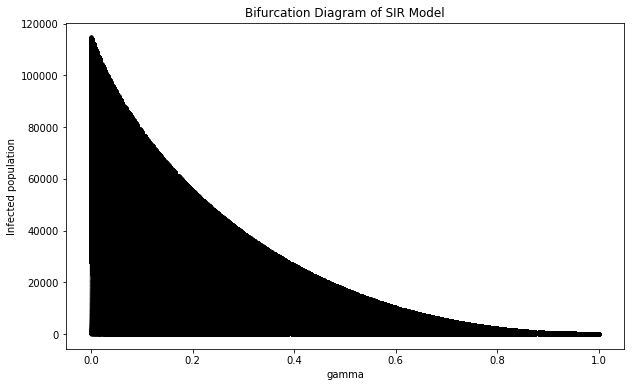

In [17]:
# Bifurcation for gamma
t = np.linspace(0, 200, 10000)
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Bifurcation Diagram of SIR Model')
ax.set_xlabel('gamma')
ax.set_ylabel('Infected population')
for gamma in gammas:
    # Solve the ODEs
    params=(beta,gamma,delta)
    sol = odeint(SIR_MODEL, [S0,I0, R0,D0], t, args=(params,))
    S, I, R,D = sol.T

    # Plot infected population vs beta
    
    ax.plot(gamma * np.ones_like(I), I, 'k.', alpha=0.2)
    
plt.show()